# Data processing basics

Follow the contents of this notebook and answer all questions (e.g. **Q1: ...**)

## If you are not familiar with Python yet... 

Maybe you can quickly review these basics first.

* [numbers](https://docs.python.org/3.6/tutorial/introduction.html#numbersnumbers) and [strings](https://docs.python.org/3.6/tutorial/introduction.html#strings);
* [if](https://docs.python.org/3.6/tutorial/controlflow.html#if-statements) and [for](https://docs.python.org/3.6/tutorial/controlflow.html#for-statements) statement
* data structure ([lists](https://docs.python.org/3.6/tutorial/introduction.html#lists), [sets](https://docs.python.org/3.6/tutorial/datastructures.html#sets), [dictionaries](https://docs.python.org/3.6/tutorial/datastructures.html#dictionaries))
* [functions](https://docs.python.org/3.6/tutorial/controlflow.html#defining-functions) and [modules](https://docs.python.org/3.6/tutorial/modules.html)

[Google's Python Class](https://developers.google.com/edu/python/?hl=en) is also a nice resource.

## Jupyter + Pandas = Awesomeness

[Jupyter notebook (lab)](http://jupyter.org) (and [IPython](https://ipython.org)) and [Pandas](http://pandas.pydata.org) may be two most important libraries responsible for the `Python`'s rise in data science. `Jupyter` lets you interactively explore datasets and code; `Pandas` lets you handle tabular datasets with superb speed and convenience. And they work so well together! In many cases, `Jupyter` and `Pandas` are all you need to load, clean, transform, visualize, and understand a dataset.

If you are not familiar with `Pandas`, you may want to follow their official tutorial called [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html) now or in the near future. 

## Importing pandas

The convention for importing `pandas` is the following

In [1]:
import pandas as pd

You can check the version of the library. Because pandas is fast-evolving library, you want to make sure that you have the up-to-date version of the library. 

In [2]:
pd.__version__

'1.5.3'

You also need `matplotlib`, which is used by `pandas` to plot figures. The following is the most common convention to import `matplotlib` library. 

In [3]:
import matplotlib.pyplot as plt

Let's check its version too. 

In [4]:
import matplotlib
matplotlib.__version__

'3.7.0'

## Loading a CSV data file

Using pandas, you can read tabular data files in [many formats and through many protocols](https://pandas.pydata.org/pandas-docs/stable/io.html). Pandas supports not only flat files such as `.csv`, but also various other formats including clipboard, Excel, JSON, HTML, Feather, Parquet, SQL, Google BigQuery, and so on. Moreover, you can pass a local file path or a URL. If it's on Amazon S3, just pass a url like `s3://path/to/file.csv`. If it's on a webpage, then just use `https://some/url.csv`. 

Let's load a dataset about the location of pumps in the John Snow's map. You can download the file to your computer and try to load it using the local path too. 

In [5]:
pump_df = pd.read_csv('https://raw.githubusercontent.com/yy/dviz-course/master/data/pumps.csv')

`df` stands for "[Data Frame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)", which is a fundamental data object in Pandas. You can take a look at the dataset by looking at the first few lines.

In [6]:
pump_df.head() 

,X,Y
0,8.651201,17.891600
1,10.984780,18.517851
2,13.378190,17.394541
3,14.879830,17.809919
4,8.694768,14.905470


**Q1: can you print only the first three lines?** Refer: http://pandas.pydata.org/pandas-docs/stable/index.html

In [7]:
# TODO: write your code here
pump_df.head(3) 

,X,Y
0,8.651201,17.891600
1,10.984780,18.517851
2,13.378190,17.394541


You can also sample several rows randomly. If the data is sorted in some ways, sampling may give you a rather unbiased view of the dataset.  

In [10]:
# Your code here
pump_df.sample()

,X,Y
11,16.00511,5.046838


You can also figure out the number of rows in the dataset by running 

In [11]:
len(pump_df)

13

Note that `df.size` does not give you the number of rows. It tells you the number of elements. 

In [12]:
pump_df.size

26

You can also look into the shape of the dataset as well as what are the columns in the dataset. 

In [13]:
pump_df.shape  # 13 rows and 2 columns

(13, 2)

In [14]:
pump_df.columns

Index(['X', 'Y'], dtype='object')

You can also check out basic descriptive statistics of the whole dataset by using `describe()` method.  

In [15]:
pump_df.describe()

,X,Y
count,13.000000,13.000000
mean,12.504677,11.963446
std,3.376869,4.957821
min,8.651201,5.046838
25%,8.999440,7.958250
50%,12.571360,11.727170
75%,14.879830,17.394541
max,18.914391,18.517851


You can slice the data like a list

In [16]:
pump_df[:2]

,X,Y
0,8.651201,17.891600
1,10.984780,18.517851


In [17]:
pump_df[-2:]

,X,Y
11,16.00511,5.046838
12,8.99944,5.101023


In [18]:
pump_df[1:5]

,X,Y
1,10.984780,18.517851
2,13.378190,17.394541
3,14.879830,17.809919
4,8.694768,14.905470


or filter rows using some conditions. 

In [19]:
pump_df[pump_df.X > 13]

,X,Y
2,13.378190,17.394541
3,14.879830,17.809919
8,13.521460,7.958250
9,16.434891,9.252130
10,18.914391,9.737819
11,16.005110,5.046838


Now let's load another CSV file that documents the cholera deaths. The URL is https://raw.githubusercontent.com/yy/dviz-course/master/data/deaths.csv

**Q2: load the death dataset and inspect it**

1. **load this dataset as `death_df`.**
2. **show the first 2 rows.**
3. **show the total number of rows.**

In [21]:
# TODO: Remove below dummy dataframe and write your code here. You probably want to create multiple cells.
death_df = pd.DataFrame({"X": [2., 3.], "Y": [1., 2.]})

In [24]:

# Display the first 2 rows
print(death_df.head(2))

# Show the total number of rows
num_rows = len(death_df)
print("Total:", num_rows)


     X    Y
0  2.0  1.0
1  3.0  2.0
Total: 2


## Some visualizations?

Let's visualize them! Pandas actually provides [a nice visualization interface](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) that uses [matplotlib](https://matplotlib.org) under the hood. You can do many basic plots without learning `matplotlib`. So let's try. 

<Axes: >

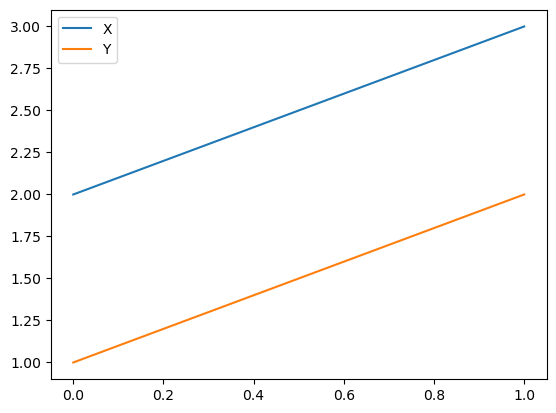

In [25]:
death_df.plot()

This is not what we want! When asked to plot the data, it tries to figure out what we want based on the type of the data. However, that doesn't mean that it will successfully do so!

Oh by the way, depending on your environment, you may not see any plot. If you don't see anything run the following command.

In [26]:
%matplotlib inline

The commands that start with `%` is called [the magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib), which are available in IPython and Jupyter. The purpose of this command is telling the IPython / Jupyter to show the plot right here instead of trying to use other external viewers. 

Anyway, this doesn't seem like the plot we want. Instead of putting each row as a point in a 2D plane by using the X and Y as the coordinate, it just created a line chart. Let's fix it. Please take a look at [the plot method documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html). How should we change the command? Which `kind` of plot do we want to draw? 

Yes, we want to draw a *scatter plot* using x and y as the Cartesian coordinates. 

<Axes: xlabel='X', ylabel='Y'>

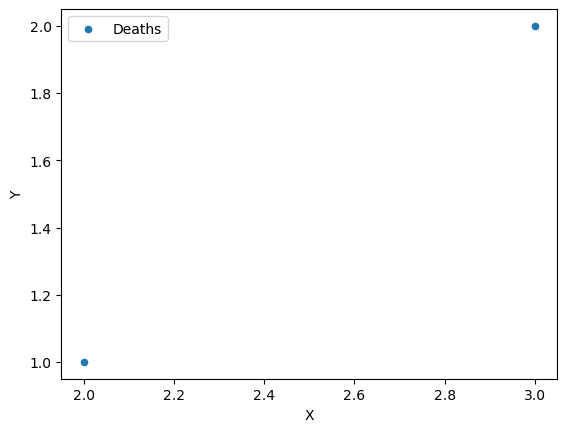

In [27]:
death_df.plot(x='X', y='Y', kind='scatter', label='Deaths')

I think I want to reduce the size of the dots and change the color to black. But it is difficult to find how to do that! It is sometimes quite annoying to figure out how to change how the visualization looks, especially when we use `matplotlib`. Unlike some other advanced tools, `matplotlib` does not provide a very coherent way to adjust your visualizations. That's one of the reasons why there are lots of visualization libraries that *wrap* `matplotlib`. Anyway, this is how you do it. 


<Axes: xlabel='X', ylabel='Y'>

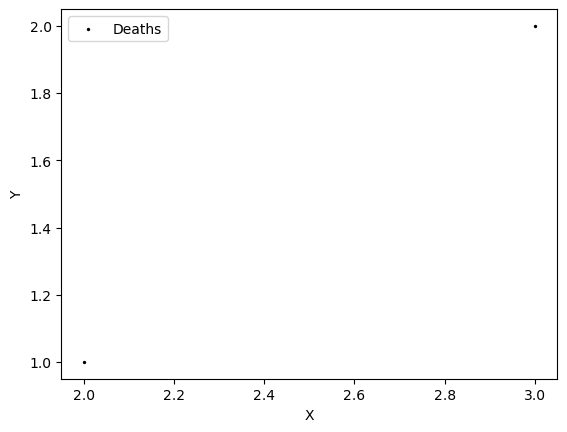

In [28]:
death_df.plot(x='X', y='Y', kind='scatter', label='Deaths', s=2, c='black')

Can we visualize both deaths and pumps? 

<Axes: xlabel='X', ylabel='Y'>

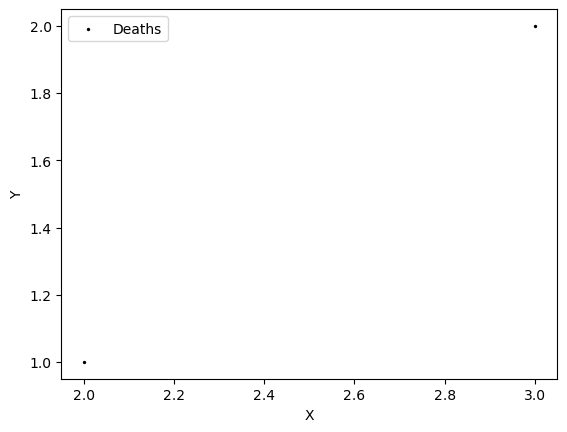

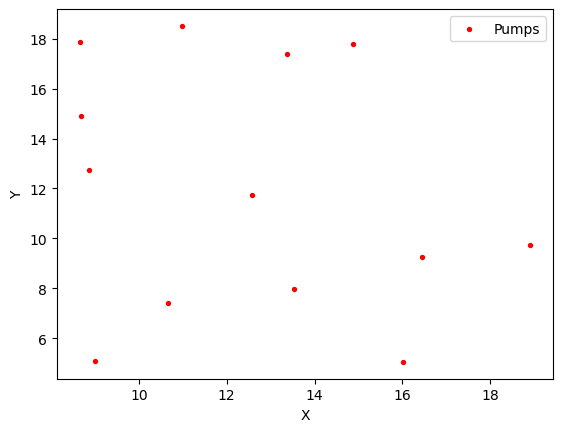

In [29]:
death_df.plot(x='X', y='Y', s=2, c='black', kind='scatter', label='Deaths')
pump_df.plot(x='X', y='Y', kind='scatter', c='red', s=8, label='Pumps')

Oh well, this is not what we want! We want to overlay them to see them together, right? How can we do that? Before going into that, we probably want to understand some key components of matplotlib figures. 

## Figure and Axes

Why do we have two separate plots? The reason is that, by default, the `plot` method creates a new \emph{figure} instead of putting them inside a single figure. In order to avoid it, we need to either create an [Axes](https://matplotlib.org/api/axes_api.html) and tell `plot` to use that axes. What is an `axes`? See this illustration. 

<img src="https://matplotlib.org/1.5.1/_images/fig_map.png" alt="figure, axes, and axis" style="width: 500px;"/>


A figure can contain multiple axes ([link](https://matplotlib.org/gallery/subplots_axes_and_figures/subplot_demo.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-demo-py)). The figure below contains two axes:

![multipleaxes](https://matplotlib.org/_images/sphx_glr_subplot_demo_001.png)

and an axes can contain multiple plots ([link](https://matplotlib.org/gallery/api/two_scales.html#sphx-glr-gallery-api-two-scales-py)). 

![multipleplots](https://matplotlib.org/_images/sphx_glr_two_scales_001.png)

Conveniently, when you call `plot` method, it creates an axes and returns it to you

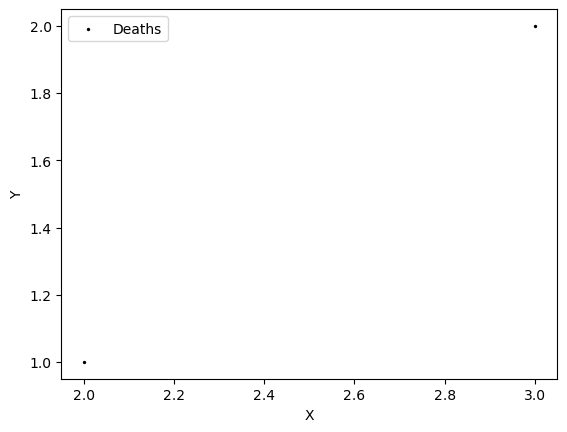

In [30]:
ax = death_df.plot(x='X', y='Y', s=2, c='black', kind='scatter', label='Deaths')

In [31]:
ax

<Axes: xlabel='X', ylabel='Y'>

This object contains all the information and objects in the plot we see. Whatever we want to do with this axes (e.g., changing x or y scale, overlaying other data, changing the color or size of symbols, etc.) can be done by accessing this object. 

Then you can pass this axes object to another plot to put both plots in the same axes. Note `ax=ax` in the second plot command. It tells the plot command _where_ to draw the points. 

<Axes: xlabel='X', ylabel='Y'>

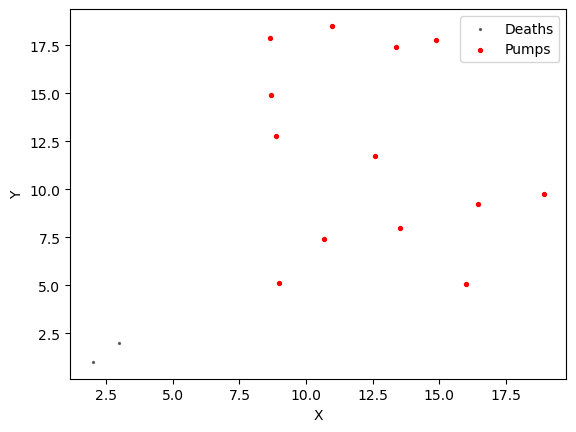

In [32]:
ax = death_df.plot(x='X', y='Y', s=2, c='black', alpha=0.5, kind='scatter', label='Deaths')
pump_df.plot(x='X', y='Y', kind='scatter', c='red', s=8, label='Pumps', ax=ax)

Although simply invoking the `plot()` command is quick and easy when doing an exploratory data analysis, it is usually better to be formal about figure and axes objects. 

Here is the recommended way to create a plot. Call the `subplots()` method (see https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html) to get the figure and axes objects explicitly. 

As you can see below, `subplots()` creates an empty figure and returns the figure and axes object to you. Then you can fill this empty canvas with your plots. Whatever manipulation you want to make about your figure (e.g., changing the size of the figure) or axes (e.g., drawing a new plot on it) can be done with `fig` and `ax` objects. So whenever possible, use this method! 

**Now, can you use this method to produce the same plot just above?**

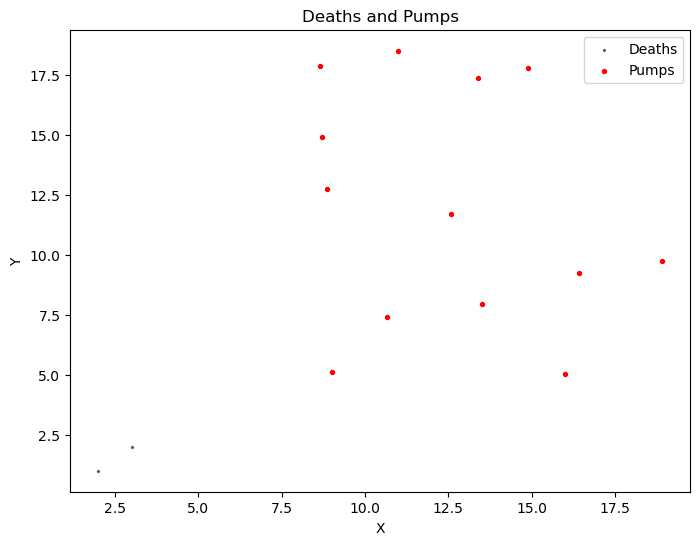

In [41]:
# Create a subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot for death_df
ax.scatter(death_df['X'], death_df['Y'], s=2, c='black', alpha=0.5, label='Deaths')

# Plot for pump_df
ax.scatter(pump_df['X'], pump_df['Y'], s=8, c='red', label='Pumps')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Deaths and Pumps')
ax.legend()

# Display the plot
plt.show()



## Voronoi diagram

Let's try the Voronoi diagram. You can use the `scipy.spatial.Voronoi` and `scipy.spatial.voronoi_plot_2d` from `scipy`, the *scientific python* library. 

In [36]:
from scipy.spatial import Voronoi, voronoi_plot_2d

Take a look at the documentation of [Voronoi](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html#scipy.spatial.Voronoi) and [voronoi_plot_2d](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.voronoi_plot_2d.html) and 

**Q3: produce a Voronoi diagram that shows the deaths, pumps, and voronoi cells**

In [37]:
# you'll need this
points = pump_df.values
points

array([[ 8.6512012, 17.8915997],
       [10.9847803, 18.5178509],
       [13.37819  , 17.3945408],
       [14.8798304, 17.8099194],
       [ 8.694768 , 14.9054699],
       [ 8.8644161, 12.75354  ],
       [12.5713596, 11.72717  ],
       [10.6609697,  7.428647 ],
       [13.5214596,  7.95825  ],
       [16.4348907,  9.2521296],
       [18.9143906,  9.7378187],
       [16.0051098,  5.0468378],
       [ 8.9994402,  5.1010232]])

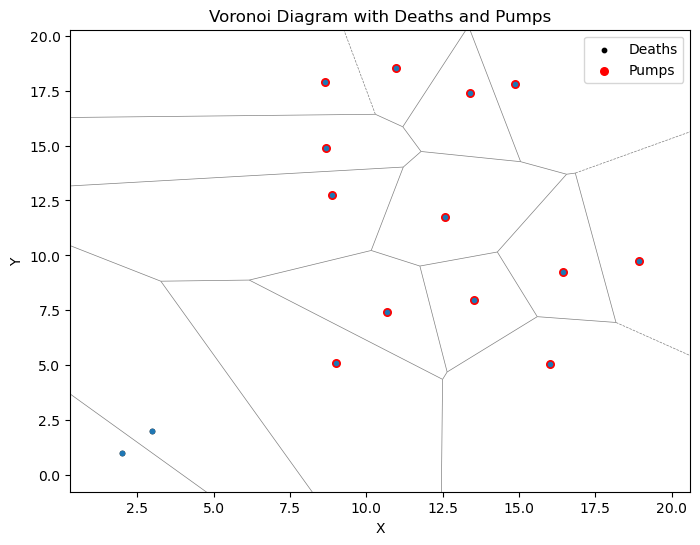

In [51]:
import pandas as pd
import numpy as np

# Assuming death_df and pump_df are loaded dataframes

# Combine deaths and pumps coordinates
points = np.vstack([death_df[['X', 'Y']].values, pump_df[['X', 'Y']].values])

# Compute Voronoi diagram
vor = Voronoi(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots(figsize=(8, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', line_width=0.5)

# Plot deaths
ax.scatter(death_df['X'], death_df['Y'], s=10, c='black', label='Deaths')

# Plot pumps
ax.scatter(pump_df['X'], pump_df['Y'], s=30, c='red', label='Pumps')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Voronoi Diagram with Deaths and Pumps')
ax.legend()

# Display the plot
plt.show()


## Saving the figure

You can also save your figure into PDF, PNG, etc. If you run the following, the plot will not only be displayed here, but also be saved as `foo.png`. 

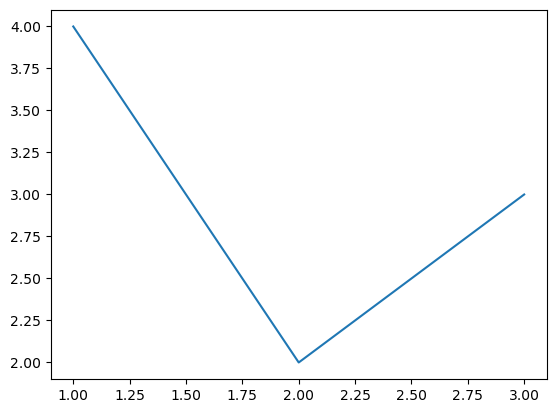

In [45]:
import matplotlib.pyplot as plt
plt.savefig('foo.png')

**Q4: Save your Voronoi diagram. Make sure that your plot contains the scatterplot of deaths & pumps as well as the Voronoi cells**

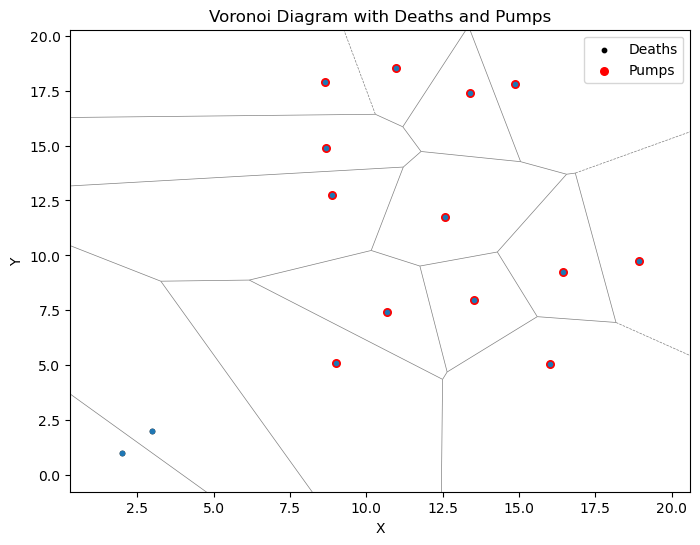

In [52]:
import pandas as pd
import numpy as np

# Assuming death_df and pump_df are loaded dataframes

# Combine deaths and pumps coordinates
points = np.vstack([death_df[['X', 'Y']].values, pump_df[['X', 'Y']].values])

# Compute Voronoi diagram
vor = Voronoi(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots(figsize=(8, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', line_width=0.5)

# Plot deaths
ax.scatter(death_df['X'], death_df['Y'], s=10, c='black', label='Deaths')

# Plot pumps
ax.scatter(pump_df['X'], pump_df['Y'], s=30, c='red', label='Pumps')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Voronoi Diagram with Deaths and Pumps')
ax.legend()

plt.savefig('voronoi_S215748.png')